In [1]:
import llm
import glob
import base64
import hashlib
import chromadb
from rich import console

c:\Users\prath\anaconda3\envs\ransh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
model = llm.get_embedding_model("clip")
c = console.Console()

In [4]:
images = glob.glob("images/*.png")
images += glob.glob("images/*.jpg")

In [5]:
embeddings = []
for image in images:
  with open(image, "rb") as image_file:
    embedding = model.embed(image_file.read())
    embeddings.append({
      "embedding": embedding,
      "filePath": image,
      "id": base64.b64encode(hashlib.sha256(image.encode()).digest()).decode()
    })

c:\Users\prath\anaconda3\envs\ransh\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
chroma_client = chromadb.PersistentClient(path="images.chromadb")
collection = chroma_client.create_collection(name="images")
collection.add(
    embeddings=[e["embedding"] for e in embeddings],
    metadatas=[{k: e[k] for k in ["filePath"]} for e in embeddings],
    ids=[e["id"] for e in embeddings],
)

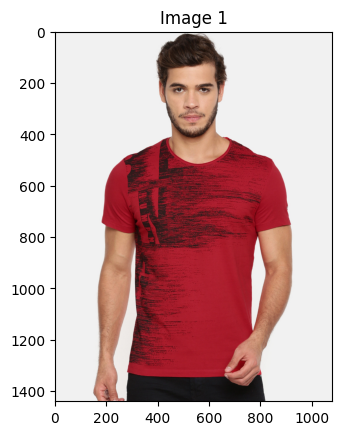

Distance for Image 1: 0.0
------------------------------


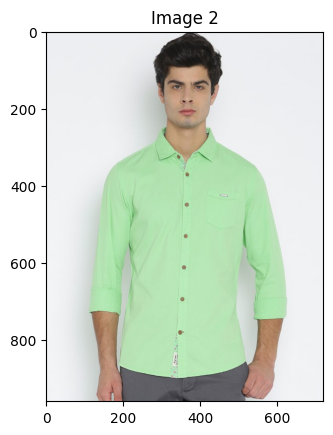

Distance for Image 2: 35.32958223721199
------------------------------


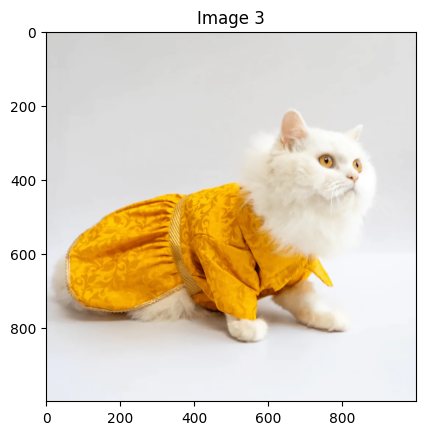

Distance for Image 3: 101.62303119004461
------------------------------


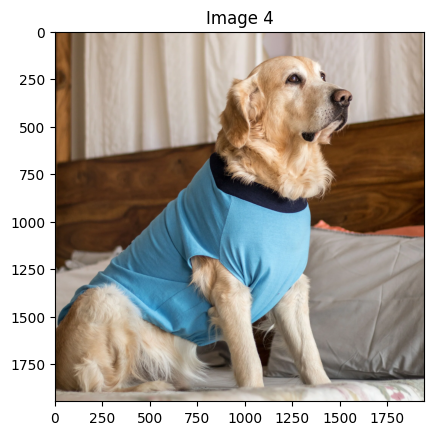

Distance for Image 4: 105.17466735839844
------------------------------


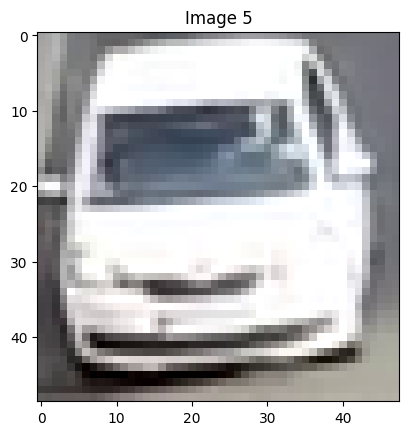

Distance for Image 5: 107.35697679247816
------------------------------


In [10]:
query_embeddings = model.embed(open("images/person.png", "rb").read())
data = collection.query(
query_embeddings=[query_embeddings],
n_results=5
)

image_paths = data['metadatas'][0]
distances = data['distances'][0]

for i, (image_path, distance) in enumerate(zip(image_paths, distances)):
    # Display image
    img = mpimg.imread(image_path['filePath'])
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.show()

    # Display distance
    print(f"Distance for Image {i+1}: {distance}")
    print('-' * 30)

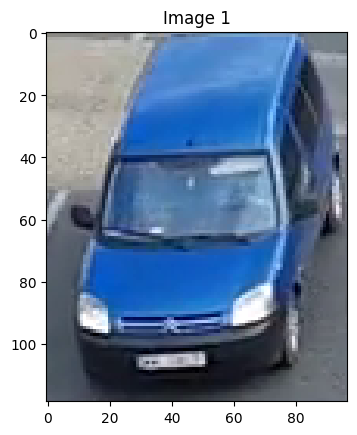

Distance for Image 1: 0.0
------------------------------


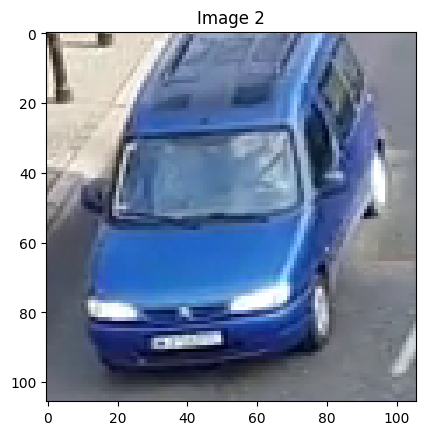

Distance for Image 2: 12.726972764894057
------------------------------


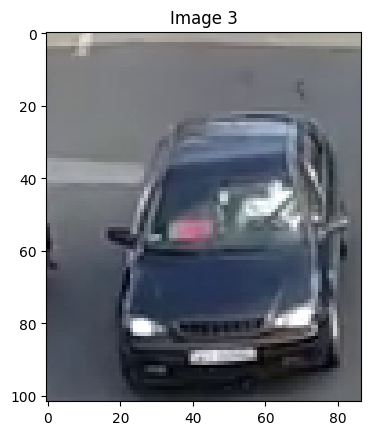

Distance for Image 3: 16.409175872802734
------------------------------


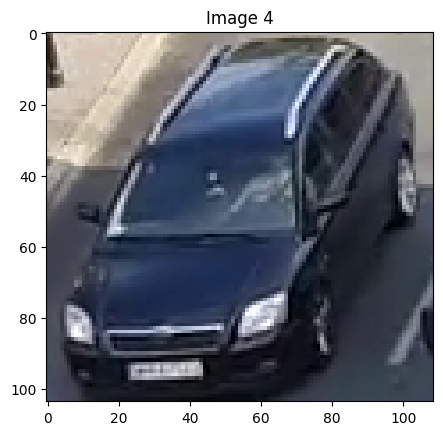

Distance for Image 4: 19.517864227294922
------------------------------


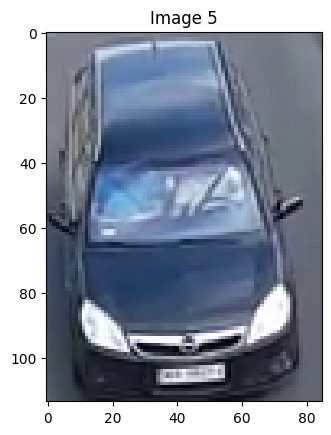

Distance for Image 5: 19.749330520629883
------------------------------


In [11]:
query_embeddings = model.embed(open("images/img_31582.png", "rb").read())
data = collection.query(
query_embeddings=[query_embeddings],
n_results=5
)

image_paths = data['metadatas'][0]
distances = data['distances'][0]

for i, (image_path, distance) in enumerate(zip(image_paths, distances)):
    # Display image
    img = mpimg.imread(image_path['filePath'])
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.show()

    # Display distance
    print(f"Distance for Image {i+1}: {distance}")
    print('-' * 30)

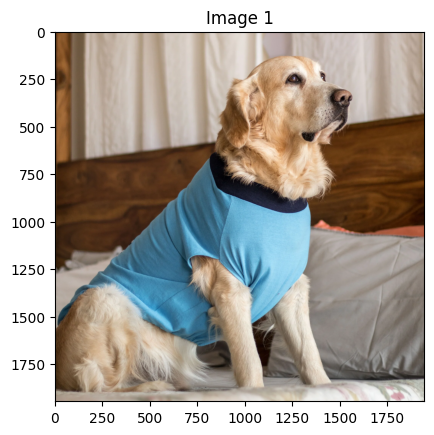

Distance for Image 1: 0.0
------------------------------


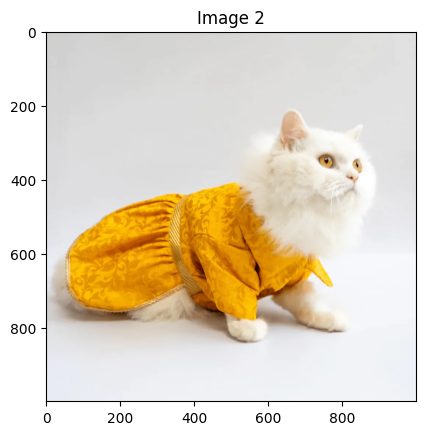

Distance for Image 2: 67.58860991809843
------------------------------


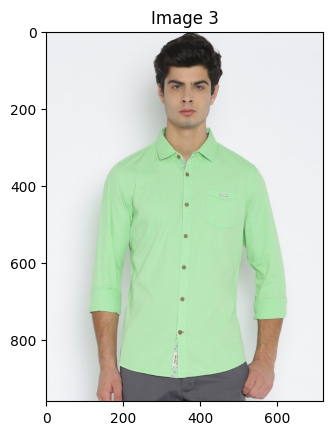

Distance for Image 3: 98.16701682724164
------------------------------


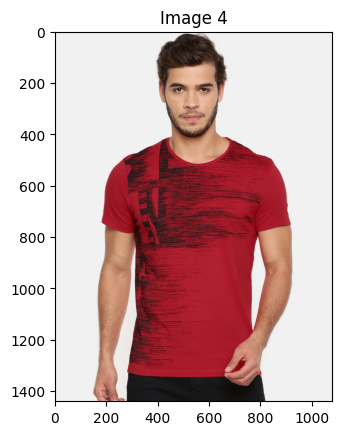

Distance for Image 4: 105.17466658335962
------------------------------


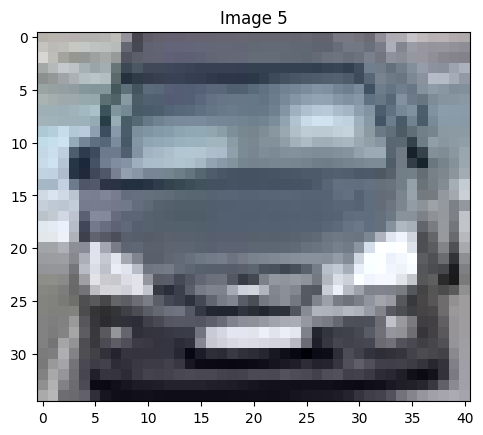

Distance for Image 5: 114.07408982589492
------------------------------


In [13]:
query_embeddings = model.embed(open("images/dog.png", "rb").read())
data = collection.query(
query_embeddings=[query_embeddings],
n_results=5
)

image_paths = data['metadatas'][0]
distances = data['distances'][0]

for i, (image_path, distance) in enumerate(zip(image_paths, distances)):
    # Display image
    img = mpimg.imread(image_path['filePath'])
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.show()

    # Display distance
    print(f"Distance for Image {i+1}: {distance}")
    print('-' * 30)